In [31]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import (
confusion_matrix,
accuracy_score,
precision_score,
recall_score,
f1_score,
roc_curve,
auc,
)

In [2]:
np.random.seed(42)

In [6]:
n_samples = 300
age = np.random.randint(30,80,size=n_samples)
chol = np.random.randint(150,300,size=n_samples)
maxhr = np.random.randint(90,200,size=n_samples)

risk_score = .03*(age-40) + .02*(chol-200) - .02*(maxhr-140)
prob = 1/(1+np.exp(-.05*risk_score))
target = (prob>np.median(prob)).astype(int)
target

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [10]:
df = pd.DataFrame({
    'age':age,
    'cholesterol':chol,
    'maxhr':maxhr,
    'target':target
})
df.head()

,age,cholesterol,maxhr,target
0,32,163,171,0
1,48,274,107,1
2,52,207,155,0
3,58,177,157,0
4,59,175,183,0


In [16]:
X_train,X_test,y_train,y_test = train_test_split(df[['age','cholesterol','maxhr']],df['target'],test_size=.2,random_state=42)
tree = DecisionTreeClassifier(max_depth=4,random_state=42)
tree.fit(X_train,y_train)
tree

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
# confusion matrix
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[28,  3],
       [ 5, 24]])

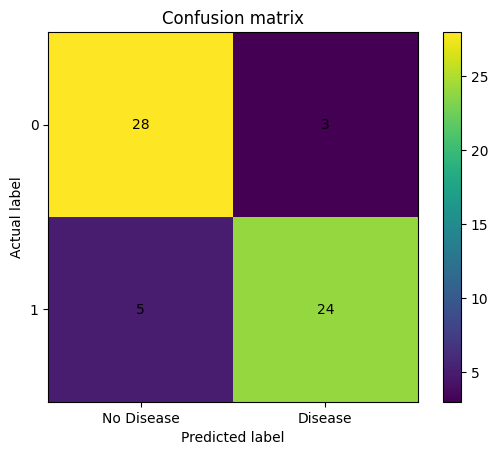

In [30]:
# Plotting confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm,interpolation='nearest')
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(['No Disease','Disease'])
ax.set_xticklabels(['No Disease','Disease'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j,i,cm[i,j],ha='center',va='center')
plt.colorbar(im)
plt.show()

In [37]:
# Accuracy, recall, precision, F1 score
accuracy_score(y_test,y_pred),recall_score(y_test,y_pred),precision_score(y_test,y_pred),f1_score(y_test,y_pred)

(0.8666666666666667,
 0.8275862068965517,
 0.8888888888888888,
 0.8571428571428571)

In [40]:
# Predicted probabilities
y_probability = tree.predict_proba(X_test)[:,1]
y_probability[:10]

array([0.        , 0.        , 1.        , 1.        , 0.        ,
       0.05555556, 0.        , 1.        , 1.        , 0.        ])

In [43]:
# ROC curve and AUC
fpr,tpr,threshold = roc_curve(y_test,y_probability)
roc_auc = auc(fpr,tpr)
print('AUC',roc_auc)

AUC 0.89265850945495


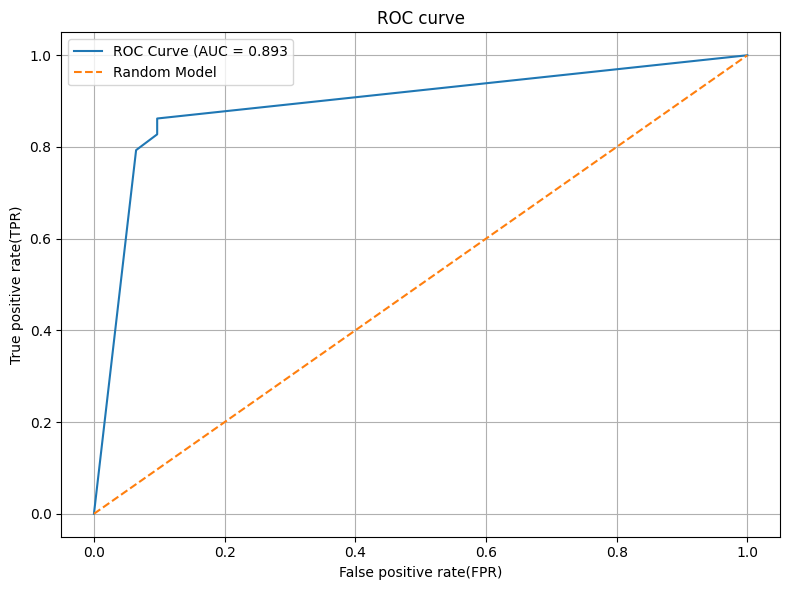

In [49]:
#Plot
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label=f'ROC Curve (AUC = {roc_auc:.3f}')
plt.plot([0,1],[0,1],linestyle='--',label='Random Model')
plt.xlabel('False positive rate(FPR)')
plt.ylabel('True positive rate(TPR)')
plt.title('ROC curve')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()